In [ ]:
!git clone https://@github.com/marcin119a/sat-experiments.git
%cd sat-experiments

Cloning into 'sat-experiments'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 215 (delta 46), reused 0 (delta 0), pack-reused 137
Receiving objects: 100% (215/215), 11.45 MiB | 22.24 MiB/s, done.
Resolving deltas: 100% (96/96), done.
/content/sat-experiments


In [ ]:
%cd /content/sat-experiments/akmaxsat_1.1
!make

/content/sat-experiments/akmaxsat_1.1
g++ -O3 -Wall -ansi -fomit-frame-pointer -funroll-loops -DNDEBUG  restore_list.cpp -c -o restore_list.o
g++ -O3 -Wall -ansi -fomit-frame-pointer -funroll-loops -DNDEBUG  clauses.cpp -c -o clauses.o
g++ -O3 -Wall -ansi -fomit-frame-pointer -funroll-loops -DNDEBUG  akmaxsat.cpp -o akmaxsat restore_list.o clauses.o
akmaxsat.cpp: In function ‘void fast_backtrack(CNF_Formula<long long int>&)’:
akmaxsat.cpp:274:6: warning: unused variable ‘L’ [-Wunused-variable]
  int L, p;
      ^
akmaxsat.cpp:278:7: warning: variable ‘do_lb_calc’ set but not used [-Wunused-but-set-variable]
  bool do_lb_calc = false;//cf.getNVars() <= 200 || (cf.getBestCost() < cf.getHardWeight());
       ^~~~~~~~~~
akmaxsat.cpp:279:7: warning: variable ‘firstlb’ set but not used [-Wunused-but-set-variable]
  bool firstlb = true;
       ^~~~~~~
In file included from akmaxsat.cpp:35:0:
cnf_formula.hpp: In instantiation of ‘bool CNF_Formula<TL>::detectConflictFl(bool&, int&, int&) [with 

In [ ]:
%cd /content/sat-experiments

/content/sat-experiments


In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/satproject/neuralheuristicsforsat to /tmp/pip-req-build-jfoj26rh
  Running command git clone -q https://github.com/satproject/neuralheuristicsforsat /tmp/pip-req-build-jfoj26rh
     |████████████████████████████████| 7.8MB 3.2MB/s 
     |████████████████████████████████| 83.1MB 58kB/s 
     |████████████████████████████████| 3.3MB 48.5MB/s 
     |████████████████████████████████| 3.1MB 44.9MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
  Created wheel for projekt-sat: filename=projekt_sat-1.0.0-cp36-none-any.whl size=1182 sha256=11cc612028c7adc73bf014e68438ab8053fdd5c74f213df90288391cdb4909bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-0897i1iv/wheels/be/7f/db/6e8ebfa23a7134a0bf146cb48f6f2b433bf73645f9de997403
  Created wheel for python-sat: filename=python_sat-0.1.6.dev3-cp36-cp36m-linux_x86_64.whl size=1312878 sha256=9cb519790d523a549145212731c1d03f688a4cf3242fddca6450292b51ebd4cf
  Stored in directory: /root/.cache/pip/wheels/cc/8b/a4/

In [ ]:
!git clone https://github.com/satproject/neuralheuristicsforsat.git

Cloning into 'neuralheuristicsforsat'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 76 (delta 23), reused 6 (delta 1), pack-reused 25
Unpacking objects: 100% (76/76), done.


In [ ]:
hyperparameters = {
    #'class_weight': hp.choice('class_weight', [None, 'balanced']), @TODO
    'N': 400,
    'sigma': 0.2,
    'dt': 0.3,
    'zeta': 1,
    'attempt_num': 1000,
    'alpha': 0.2,
    'complexity': 50,
    'seed': 1000,
    'observations': 1000 #batch_size
}

In [ ]:
!python /content/sat-experiments/neuralheuristicsforsat/dump_dataset_2sat.py -o 10000 -c 20 -j 10000

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [ ]:
!git pull origin master

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/marcin119a/sat-experiments
 * branch            master     -> FETCH_HEAD
   b3aac67..6d67033  master     -> origin/master
Updating b3aac67..6d67033
Fast-forward
 maxsat.py | 9 +++++++++
 1 file changed, 9 insertions(+)


In [ ]:
import os
import tensorflow as tf
import itertools
from neuralheuristicsforsat.helpers import chunkIt, save_to_csv
import maxsat
from maxsat import brute_force_2_max_sat, transform
import time
from SIMCIM import SIMCim
import csv

params = hyperparameters
n = 1000
tfrecord_location = '/content/sat-experiments/sr_1000/test_21021_sr_1000.tfrecord'

record_iterator = tf.python_io.tf_record_iterator(path=tfrecord_location)
preds = []
batch_size = params['observations']

from maxsat import akmaxsat_format_to_list, akmaxsat_run, function_from_akmaxsat, brute_force_2_max_sat, dump

from importlib import reload
reload(maxsat)

train_set = {'cnf': list(), 'sat': list()}
sim_results = list()

for string_record in itertools.islice(record_iterator, 100):
    example = tf.train.Example()
    example.ParseFromString(string_record)

    m = len(example.features.feature["inputs"].float_list.value) // 2

    inputs = chunkIt(example.features.feature["inputs"].float_list.value, m) 
    train_set['cnf'].append(inputs)
    targ = int(example.features.feature["sat"].float_list.value[0])
    train_set['sat'].append(targ)

    start = time.time()
    cnf = transform(inputs)
    dump(inputs, n, m, round(start,2))

    s = '/content/sat-experiments/out/{0}.txt'.format(round(start,2))
    output = akmaxsat_run('/content/sat-experiments/akmaxsat_1.1/akmaxsat',s)

      
    literals = set()
    for conj in cnf:
            for disj in conj:
                literals.add(disj[0])
    check_cnf = [bool(disj.intersection(output)) for disj in cnf]
    MAX_akmaxsat = check_cnf.count(True)
    #if targ == 0:
      #vars, max_2sat = brute_force_2_max_sat(cnf)
    #  pass
    #else:
      #max_2sat = m
    
    sim_result = SIMCim(params, n, m, inputs)  # predict SIMCim, inputs- params ISING Model, n- variables, M-clausures

    end = time.time()
    
    #print(m + sim_result == max_2sat)
    save_to_csv('max_sat_100.csv', [[m, m / n, m + sim_result, MAX_akmaxsat, targ, end - start]], n)
    sim_results.append(sim_result)

{('0000000001', True), ('0000000718', True), ('0000000896', True), ('0000000488', False), ('0000000293', False), ('0000000078', True), ('0000000406', False), ('0000000814', False), ('0000000151', False), ('0000000115', True), ('0000000522', True), ('0000000600', True), ('0000000670', False), ('0000000930', True), ('0000000972', True), ('0000000312', True), ('0000000716', True), ('0000000936', True), ('0000000176', True), ('0000000240', False), ('0000000922', True), ('0000000304', False), ('0000000394', True), ('0000000932', False), ('0000000252', False), ('0000000678', False), ('0000000685', False), ('0000000029', True), ('0000000512', True), ('0000000588', True), ('0000000220', False), ('0000000960', True), ('0000000531', False), ('0000000533', False), ('0000000493', True), ('0000000530', True), ('0000000101', False), ('0000000505', False), ('0000000554', True), ('0000000025', True), ('0000000335', False), ('0000000797', True), ('0000000045', True), ('0000000170', False), ('0000000397

In [ ]:
!git pull origin master

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/marcin119a/sat-experiments
 * branch            master     -> FETCH_HEAD
   c40ffe4..67ef44f  master     -> origin/master
Updating c40ffe4..67ef44f
Fast-forward
 out/1595076494.18.txt | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 out/1595076494.18.txt


In [ ]:
out = [int(x) for x in "-13 -25 6 -3 -5 22 12 -7 -8 -1 23 18 29 9 -10 -27 -21 20 15 -16 -30 11 28 24 -26 -4 -14 17 2 19 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60".split(" ")]

In [ ]:
ASSIGMENT = -2
def akmaxsat_run(file, input):
  import subprocess
  output = str(subprocess.check_output([file, input])).split("\\n")
  print(output)
  vart_max = function_from_akmaxsat(output[ASSIGMENT].replace("v ", ""))
  print(vart_max)

  return vart_max

In [ ]:
akmaxsat_run('/content/sat-experiments/akmaxsat_1.1/akmaxsat', '/content/sat-experiments/1594918187.39.txt')

["b'c Number of variables occuring in the formula: 29 max variable = 60 -> remapping", 'c first lower bound: 0', 'o 2', 'o 0', 'c 3 branches 34 propagates', 'c ** akmaxsat time = 0.000550000000 seconds', 'c total generalized unit propagation = 38, success = 2.63%', 's OPTIMUM FOUND', 'c Optimal Solution = 0', 'v -13 -25 6 -3 -5 22 12 -7 -8 -1 23 18 29 9 -10 -27 -21 20 15 -16 -30 11 28 24 -26 -4 -14 17 2 19 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60', "'"]
{('0000000058', True), ('0000000034', True), ('0000000041', True), ('0000000013', False), ('0000000053', True), ('0000000048', True), ('0000000038', True), ('0000000055', True), ('0000000060', True), ('0000000043', True), ('0000000037', True), ('0000000046', True), ('0000000051', True), ('0000000054', True), ('0000000057', True), ('0000000033', True), ('0000000029', True), ('0000000049', True), ('0000000003', False), ('0000000025', False), ('0000000019', True), ('0000000036', True), ('000

{('0000000001', False),
 ('0000000002', True),
 ('0000000003', False),
 ('0000000004', False),
 ('0000000005', False),
 ('0000000006', True),
 ('0000000007', False),
 ('0000000008', False),
 ('0000000009', True),
 ('0000000010', False),
 ('0000000011', True),
 ('0000000012', True),
 ('0000000013', False),
 ('0000000014', False),
 ('0000000015', True),
 ('0000000016', False),
 ('0000000017', True),
 ('0000000018', True),
 ('0000000019', True),
 ('0000000020', True),
 ('0000000021', False),
 ('0000000022', True),
 ('0000000023', True),
 ('0000000024', True),
 ('0000000025', False),
 ('0000000026', False),
 ('0000000027', False),
 ('0000000028', True),
 ('0000000029', True),
 ('0000000030', False),
 ('0000000031', True),
 ('0000000032', True),
 ('0000000033', True),
 ('0000000034', True),
 ('0000000035', True),
 ('0000000036', True),
 ('0000000037', True),
 ('0000000038', True),
 ('0000000039', True),
 ('0000000040', True),
 ('0000000041', True),
 ('0000000042', True),
 ('0000000043', Tru

In [ ]:
!/content/sat-experiments/akmaxsat_1.1/akmaxsat /content/sat-experiments/a41594898056.7303526.txt

Parse error: did not find the parameter line
tcmalloc: large alloc 1303674880 bytes == 0x562df1a32000 @  0x7ff613a69887 0x562df048c8c9 0x562df047a6b8 0x7ff6130c3b97 0x562df047adfa
c Number of variables occuring in the formula: 0 max variable = 325918496 -> remapping
c 0 branches 0 propagates
c ** akmaxsat time = 0.537047000000 seconds
c total generalized unit propagation = 0, success = -nan%
s UNSATISFIABLE


In [ ]:
def dump(input_list, m, n):
  f = open("a{0}.txt".format(m),"a+")    
  f.write("p cnf %d %d\n" % (len(input_list), n))
  for x in input_list:
    a = x[0]
    b = x[1]
    f.write("%d %d %d\n" % (a, b, 0))
  f.close()

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

dfmaxsat = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_20/logs_max_sat_2000.csv_20.csv', names=['M','alfa','max_sim','max_brute','sat_label', 'TIME'], sep=',').sort_values(['alfa'])
dfmaxsat300 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_300/logs_max_sat_300.csv_20.csv', names=['M','alfa','max_sim','sat_label', 'TIME'], sep=',').sort_values(['alfa'])
dfmaxsat700 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_700/logs_max_sat_700.csv_20.csv', names=['M','alfa','max_sim','sat_label', 'TIME'], sep=',').sort_values(['alfa'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dfmaxsat['equal'] = pd.Series(dfmaxsat['max_sim']!=dfmaxsat['max_brute'], index=dfmaxsat.index)
dfmaxsat['equal'] = dfmaxsat['equal'].astype(int)

In [ ]:
dfmaxsat['equal']

1644    0
580     0
1252    0
164     0
213     0
       ..
1947    0
456     0
1943    1
1218    0
1022    1
Name: equal, Length: 2000, dtype: int64

df1['e'] = pd.Series(np.random.randn(sLength), index=df1.index)

In [ ]:
sat300 = dfmaxsat300[dfmaxsat300['sat_label']==1]
sat700 = dfmaxsat300[dfmaxsat300['sat_label']==1]

In [ ]:
sat700[sat700['M']!=sat700['max_sim']]

In [ ]:
unsat = dfmaxsat[dfmaxsat['sat_label']==0]
sat = dfmaxsat[dfmaxsat['sat_label']==1]

In [ ]:
print(len(unsat[unsat['max_sim']==unsat['max_brute']]))
print(len(sat[sat['max_sim']==sat['max_brute']]))

253
1614


In [ ]:
103/253

0.40711462450592883

In [ ]:
print(len(unsat[unsat['max_sim']!=unsat['max_brute']]))
print(len(sat[sat['max_sim']!=sat['max_brute']]))

103
30


In [ ]:
errors[errors['sat_label']==0]
len(dfmaxsat['sat_label']==1)

2000

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

dfmaxsat300 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_300/logs_max_sat_100.csv_300.csv', names=['M','alfa','max_sim', 'max_aka','sat_label', 'TIME'], sep=',').sort_values(['alfa'])
dfmaxsat500 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_500/logs_max_sat_100.csv_500.csv', names=['M','alfa','max_sim', 'max_aka','sat_label', 'TIME'], sep=',').sort_values(['alfa'])
dfmaxsat700 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_700/logs_max_sat.csv_700_fomulas_100.csv', names=['M','alfa','max_sim', 'max_aka','sat_label', 'TIME'], sep=',').sort_values(['alfa'])
dfmaxsat1000 = pd.read_csv('https://students.mimuw.edu.pl/~mw404851/sr_1000/logs_max_sat_100.csv_1000.csv', names=['M','alfa','max_sim', 'max_aka','sat_label', 'TIME'], sep=',').sort_values(['alfa'])

In [ ]:
x300 = dfmaxsat300[dfmaxsat300['max_aka']!=dfmaxsat300['max_sim']]
x500 = dfmaxsat500[dfmaxsat500['max_aka']!=dfmaxsat500['max_sim']]
x700 = dfmaxsat700[dfmaxsat700['max_aka']!=dfmaxsat700['max_sim']]
x1000 = dfmaxsat1000[dfmaxsat1000['max_aka']!=dfmaxsat1000['max_sim']]

In [ ]:
print(len(x300))
print(len(x500))
print(len(x700))
print(len(x1000))

66
78
79
88


In [ ]:
dfmaxsat300['equal'] = pd.Series(dfmaxsat300['max_sim']!=dfmaxsat300['max_aka'], index=dfmaxsat300.index)
dfmaxsat300['equal'] = dfmaxsat300['equal'].astype(int)
dfmaxsat500['equal'] = pd.Series(dfmaxsat500['max_sim']!=dfmaxsat500['max_aka'], index=dfmaxsat500.index)
dfmaxsat500['equal'] = dfmaxsat500['equal'].astype(int)
dfmaxsat700['equal'] = pd.Series(dfmaxsat700['max_sim']!=dfmaxsat700['max_aka'], index=dfmaxsat700.index)
dfmaxsat700['equal'] = dfmaxsat700['equal'].astype(int)
dfmaxsat1000['equal'] = pd.Series(dfmaxsat1000['max_sim']!=dfmaxsat1000['max_aka'], index=dfmaxsat1000.index)
dfmaxsat1000['equal'] = dfmaxsat1000['equal'].astype(int)

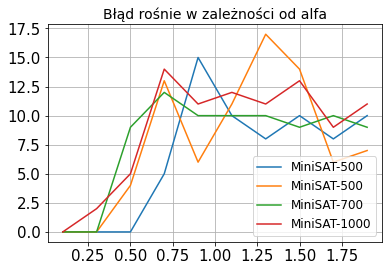

In [ ]:
import numpy as np
import pandas as pd

bins = np.arange(0, 2.1, 0.20)

dfmaxsat300['bins'] = pd.cut(dfmaxsat300.alfa, bins) 
ss_acc300 = dfmaxsat300.groupby('bins')['equal'].agg(['sum','count'])
dfmaxsat500['bins'] = pd.cut(dfmaxsat500.alfa, bins) 
ss_acc500 = dfmaxsat500.groupby('bins')['equal'].agg(['sum','count'])
dfmaxsat700['bins'] = pd.cut(dfmaxsat700.alfa, bins) 
ss_acc700 = dfmaxsat700.groupby('bins')['equal'].agg(['sum','count'])
dfmaxsat1000['bins'] = pd.cut(dfmaxsat1000.alfa, bins) 
ss_acc1000 = dfmaxsat1000.groupby('bins')['equal'].agg(['sum','count'])

y = [x.mid for x in ss_acc700.index.values]
plt.title('Błąd rośnie w zależności od alfa', fontsize=14)
plt.plot(y, ss_acc300['sum'], "-",label='MiniSAT-500')
plt.plot(y, ss_acc500['sum'], "-",label='MiniSAT-500')
plt.plot(y, ss_acc700['sum'], "-",label='MiniSAT-700')
plt.plot(y, ss_acc1000['sum'], "-",label='MiniSAT-1000')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid()
plt.legend(fontsize=12)
plt.show()